<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The data Columns :</font></h3>
    
😃We're studying to predict which customers respond positively to an automobile insurance offer.
    
🥨**Gender**: Categorical variable indicating the gender of the customer.
    
🌭**Age**: Numeric variable indicating the age of the customer.
    
🥓**Driving_License**: Binary variable indicating if the customer has a driving license (1 if yes, 0 if no).
    
🚜**Region_Code**: Numeric variable indicating the region code of the customer.
    
🥡**Previously_Insured**: Binary variable indicating if the customer was previously insured (1 if yes, 0 if no).
    
🖼**Vehicle_Age**: Categorical variable indicating the age of the vehicle.
    
🕸**Vehicle_Damage**: Categorical variable indicating if the vehicle was damaged in the past.
    
🕶**Annual_Premium**: Numeric variable indicating the annual premium amount.
    
🎡**Policy_Sales_Channel**: Numeric variable indicating the sales channel of the policy.
    
🎢**Vintage**: Numeric variable indicating the number of days the customer has been associated with the company.
    
🎞**Response**: Binary target variable indicating if the customer responded positively to the automobile insurance offer (1 if yes, 0 if no).

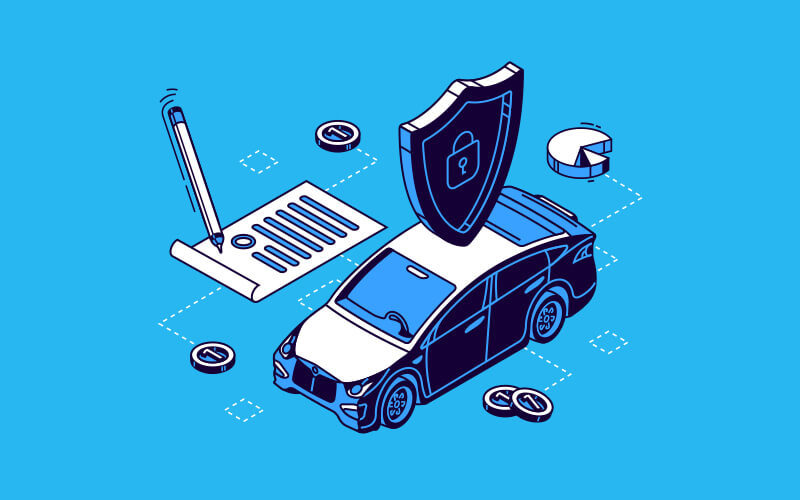

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Project :</font></h3>
    
**Task**: The objective of this competition is to predict which customers respond positively to an automobile insurance offer..

**Dataset**: The dataset for this competition (both train and test) was generated from a deep learning model trained on the Health Insurance Cross Sell Prediction Data dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

**Evaluation**: Evaluated using area under the ROC curve.

In [1]:
#%load_ext cudf.pandas

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import gc


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Evalaution Metric</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

    
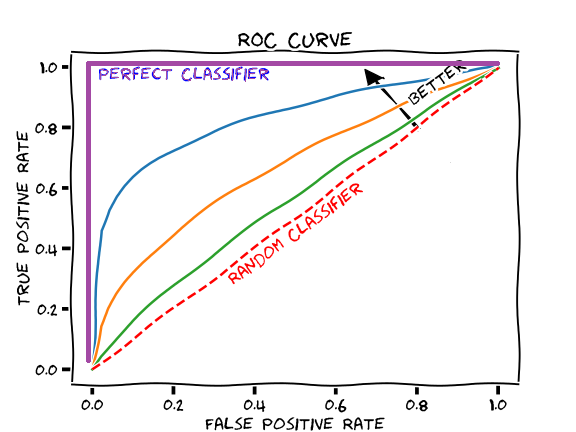

    
      

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Loading Modified Dataset ♒🌊</h1>  
     
</div>

In [3]:
df_sub=pd.read_csv("sample_submission.csv")
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: grey; padding: 10px; border-radius: 10px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">📉Check </span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> on Data  📊</span> 
</p>

In [4]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [5]:
df_test.shape,df_train.shape

((7669866, 11), (11504798, 12))

In [6]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [7]:
df_train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
le = LabelEncoder()
df_train['Gender'] = le.fit_transform(df_train['Gender'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)
df_train['Vehicle_Age'] = le.fit_transform(df_train['Vehicle_Age'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)
df_train['Vehicle_Damage'] = le.fit_transform(df_train['Vehicle_Damage'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test['Vehicle_Age'] = le.fit_transform(df_test['Vehicle_Age'])
df_test['Vehicle_Damage'] = le.fit_transform(df_test['Vehicle_Damage'])



{'Female': 0, 'Male': 1}
{'1-2 Year': 0, '< 1 Year': 1, '> 2 Years': 2}
{'No': 0, 'Yes': 1}


In [9]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,0,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,0,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,0,0,31951.0,152.0,294,0


In [10]:
df_train = df_train.astype({
'Gender': 'int64',
'Age': 'int64' ,
'Driving_License': 'int64' ,
'Region_Code': 'int64', 
'Previously_Insured': 'int64' ,
'Vehicle_Age': 'int64',
'Vehicle_Damage': 'int64',
'Annual_Premium': 'int64',
'Policy_Sales_Channel': 'int64',
'Vintage': 'int64' ,
'Response': 'int64' ,
})

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype
---  ------                -----
 0   Gender                int64
 1   Age                   int64
 2   Driving_License       int64
 3   Region_Code           int64
 4   Previously_Insured    int64
 5   Vehicle_Age           int64
 6   Vehicle_Damage        int64
 7   Annual_Premium        int64
 8   Policy_Sales_Channel  int64
 9   Vintage               int64
 10  Response              int64
dtypes: int64(11)
memory usage: 965.5 MB


In [12]:
df_train.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.413510e-01,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,5.215298e-01,5.026798e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,4.982872e-01,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,5.767390e-01,4.999928e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,1.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,2.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    
**Age Distribution:**
The age of customers ranges from **20 to 85 years**, with an **average age of approximately 38.38 years**.
This suggests a **wide age range** among the customers, which might **influence their insurance needs and responses**.
    
**Driving License:**
Almost all **customers have a driving license**, with a mean value of 0.998.
This indicates that very **few customers do not have a driving license**.
    
**Region Code:**
**Region codes vary from 0 to 52**, with a mean value of 26.42.
This suggests that **customers are spread across different regions**, which might have **varying risk profiles and insurance needs**.
    
**Previously Insured:**
About **46.3% of customers were previously insured**, as **indicated by the mean value of 0.463**.
This could impact their **likelihood of responding positively to a new insurance offer**.
    
**Annual Premium:**
The **annual premium amounts range from 2,630 to 540,165**, with an **average of 30,461.37**.
The large **standard deviation of 16,454.75 indicates significant variability in the premium amounts paid** by customers.
    
**Policy Sales Channel:**
The **policy sales channels range from 1 to 163**, with a mean value of 112.43.
This suggests a **wide variety of sales channels used, which might influence customer responses**.
    
**Vintage:**
The average vintage **(number of days the customer has been associated with the company) is approximately 163.90 days**, ranging from **10 to 299 days**.
**Customers' tenure with the company might affect their loyalty** and response to offers.
    
**Response:**
The target variable Response has a mean value of 0.123, **indicating that about 12.3% of customers responded positively to the automobile insurance offer**.
**This suggests an imbalanced dataset where the majority of customers did not respond positively**, **which is important to consider during modeling.**


<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: black; padding: 20px; border-radius: 20px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">📉Exploratory</span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> Data Analysis(EDA)  📊</span> 
</p>

In [13]:
import seaborn as sns

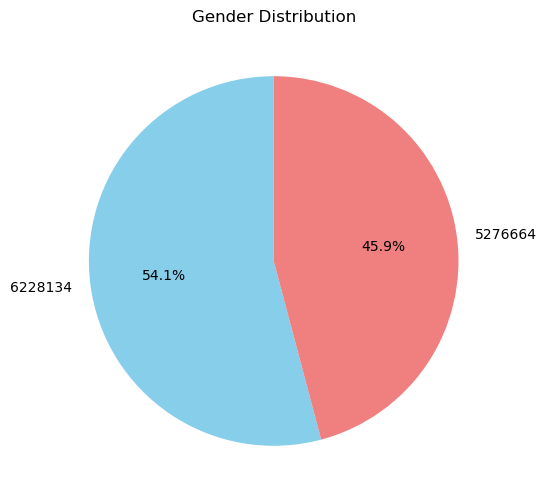

In [14]:
gender_counts = df_train['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Gender Distribution')
plt.show()

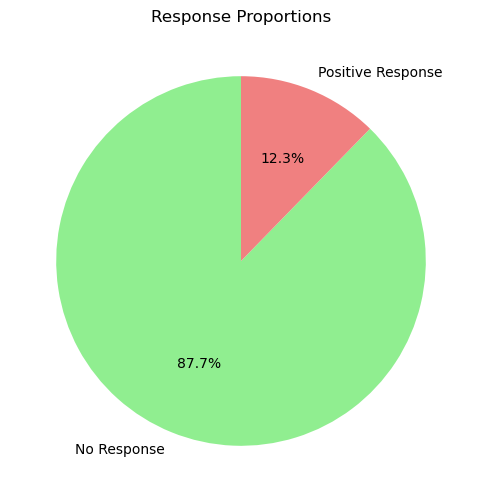

In [15]:
response_counts = df_train['Response'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(response_counts, labels=['No Response', 'Positive Response'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Response Proportions')
plt.show()

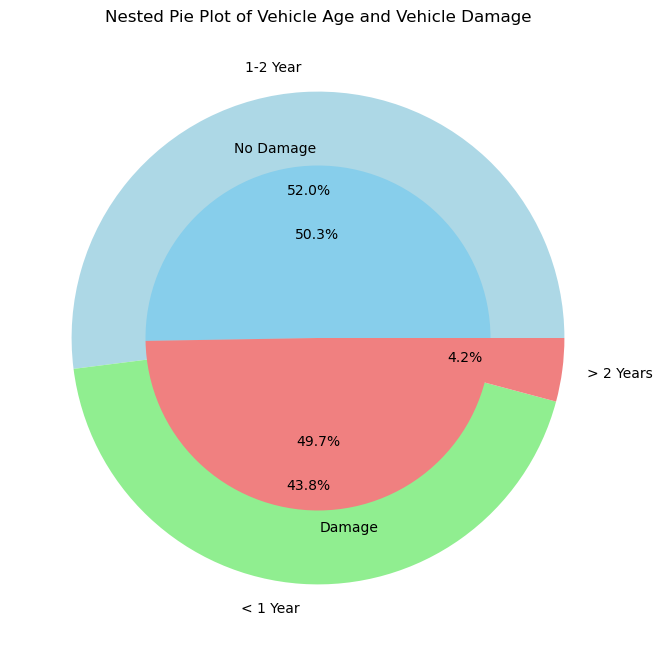

In [16]:
vehicle_age_counts = df_train['Vehicle_Age'].value_counts()
vehicle_damage_counts = df_train['Vehicle_Damage'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
vehicle_age_mapping = ['1-2 Year', '< 1 Year', '> 2 Years']
ax.pie(vehicle_age_counts, labels=vehicle_age_mapping, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], radius=1)
ax.pie(vehicle_damage_counts, labels=['No Damage', 'Damage'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], radius=0.7)
ax.set(aspect="equal", title='Nested Pie Plot of Vehicle Age and Vehicle Damage')
plt.show()

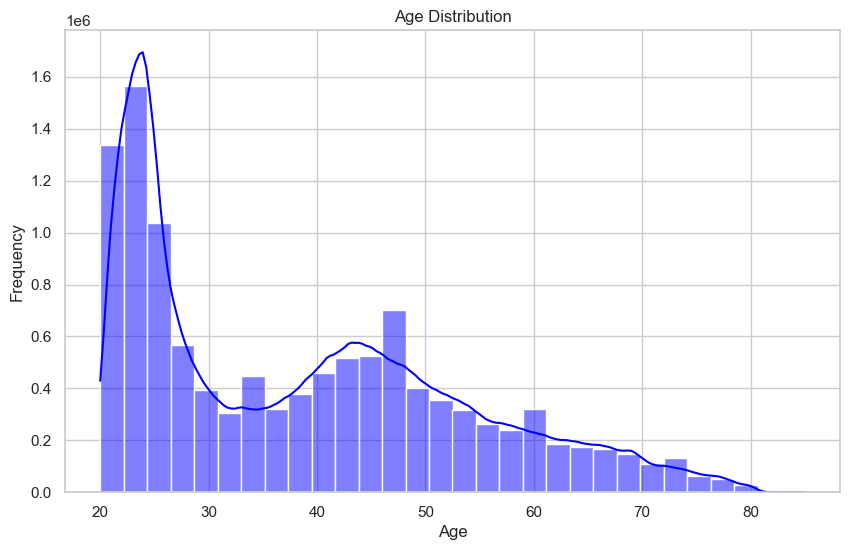

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/var/folders/d_/p5lwv9b55b1bx_rx8qk19l9h0000gn/T/ipykernel_67942/3010167479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Driving_License', data=df_train, palette='Set2')


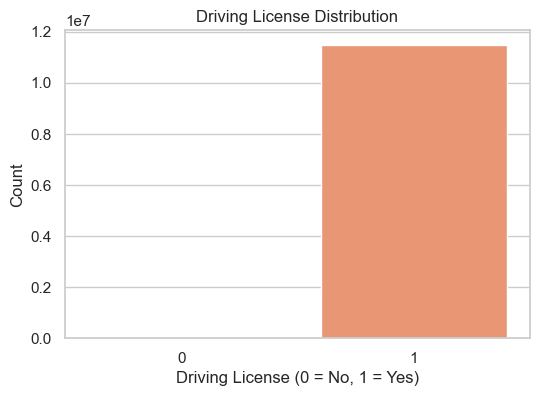

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Driving_License', data=df_train, palette='Set2')
plt.title('Driving License Distribution')
plt.xlabel('Driving License (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

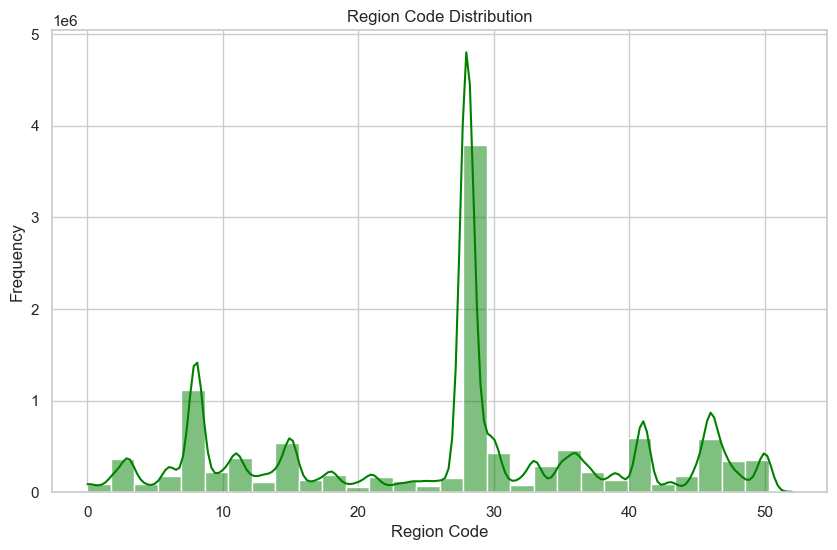

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Region_Code'], bins=30, kde=True, color='green')
plt.title('Region Code Distribution')
plt.xlabel('Region Code')
plt.ylabel('Frequency')
plt.show()

/var/folders/d_/p5lwv9b55b1bx_rx8qk19l9h0000gn/T/ipykernel_67942/4186524161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Previously_Insured', data=df_train, palette='Set1')


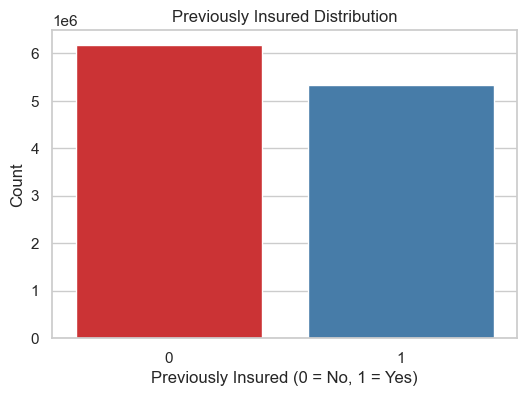

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Previously_Insured', data=df_train, palette='Set1')
plt.title('Previously Insured Distribution')
plt.xlabel('Previously Insured (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

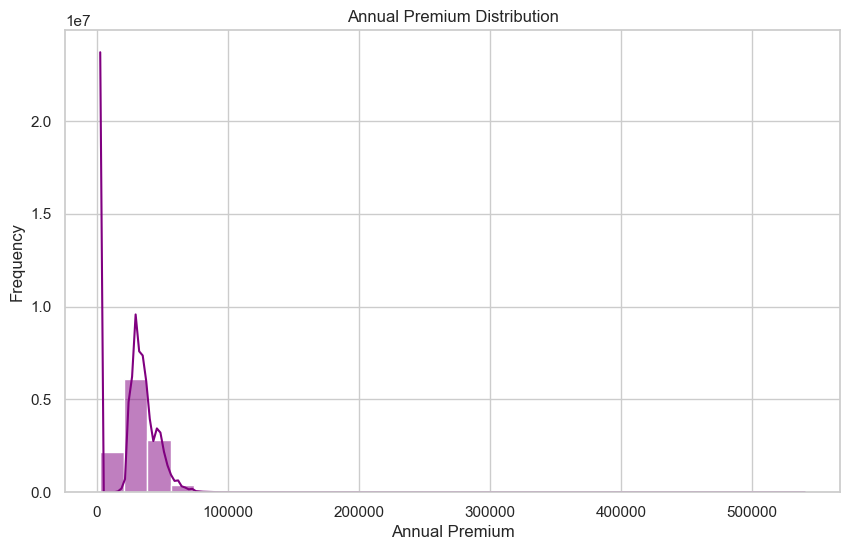

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Annual_Premium'], bins=30, kde=True, color='purple')
plt.title('Annual Premium Distribution')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

/var/folders/d_/p5lwv9b55b1bx_rx8qk19l9h0000gn/T/ipykernel_67942/2413069401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Response', data=age_response, palette='coolwarm')


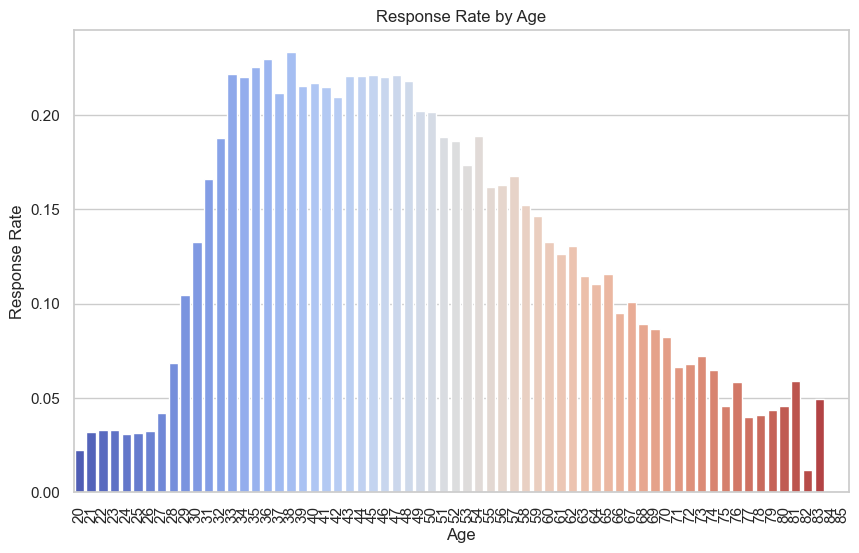

In [22]:
plt.figure(figsize=(10, 6))
age_response = df_train.groupby('Age')['Response'].mean().reset_index()
sns.barplot(x='Age', y='Response', data=age_response, palette='coolwarm')
plt.title('Response Rate by Age')
plt.xlabel('Age')
plt.ylabel('Response Rate')
plt.xticks(rotation=90)
plt.show()

/var/folders/d_/p5lwv9b55b1bx_rx8qk19l9h0000gn/T/ipykernel_67942/3321332604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Previously_Insured', y='Response', data=insured_response, palette='viridis')


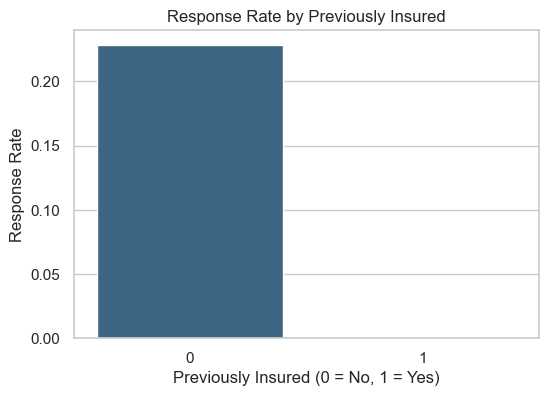

In [23]:

plt.figure(figsize=(6, 4))
insured_response = df_train.groupby('Previously_Insured')['Response'].mean().reset_index()
sns.barplot(x='Previously_Insured', y='Response', data=insured_response, palette='viridis')
plt.title('Response Rate by Previously Insured')
plt.xlabel('Previously Insured (0 = No, 1 = Yes)')
plt.ylabel('Response Rate')
plt.show()

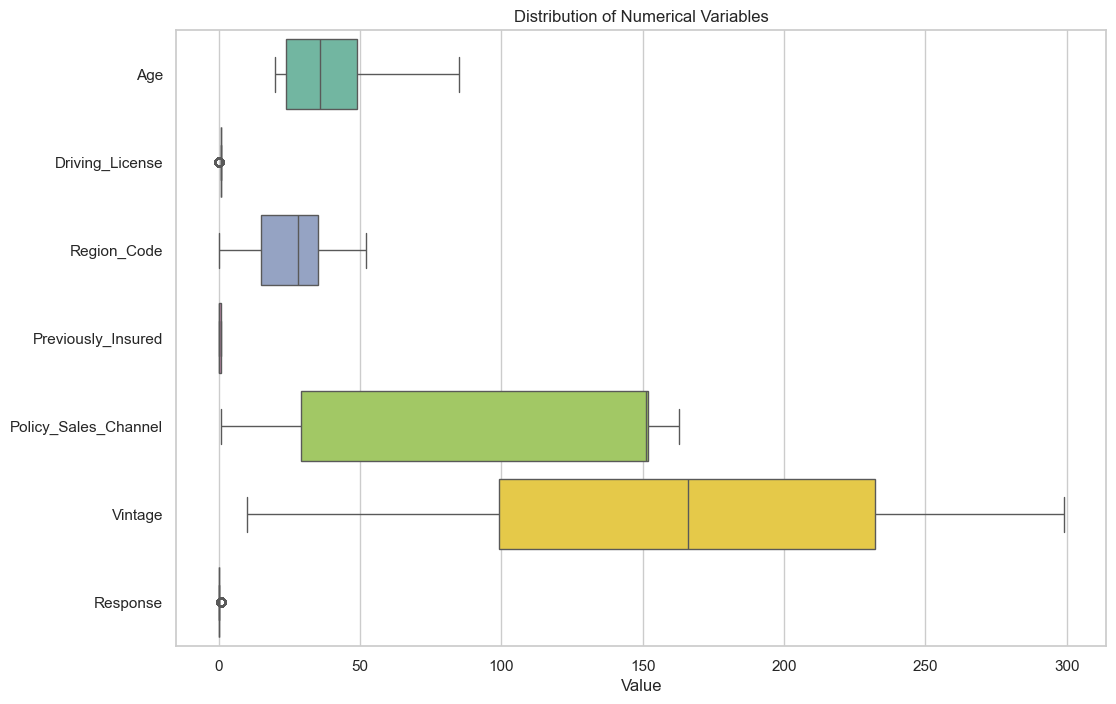

In [24]:
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 
                  'Policy_Sales_Channel', 'Vintage', 'Response']
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train[numerical_cols], orient='h', palette='Set2')
plt.title('Distribution of Numerical Variables')
plt.xlabel('Value')
plt.show()

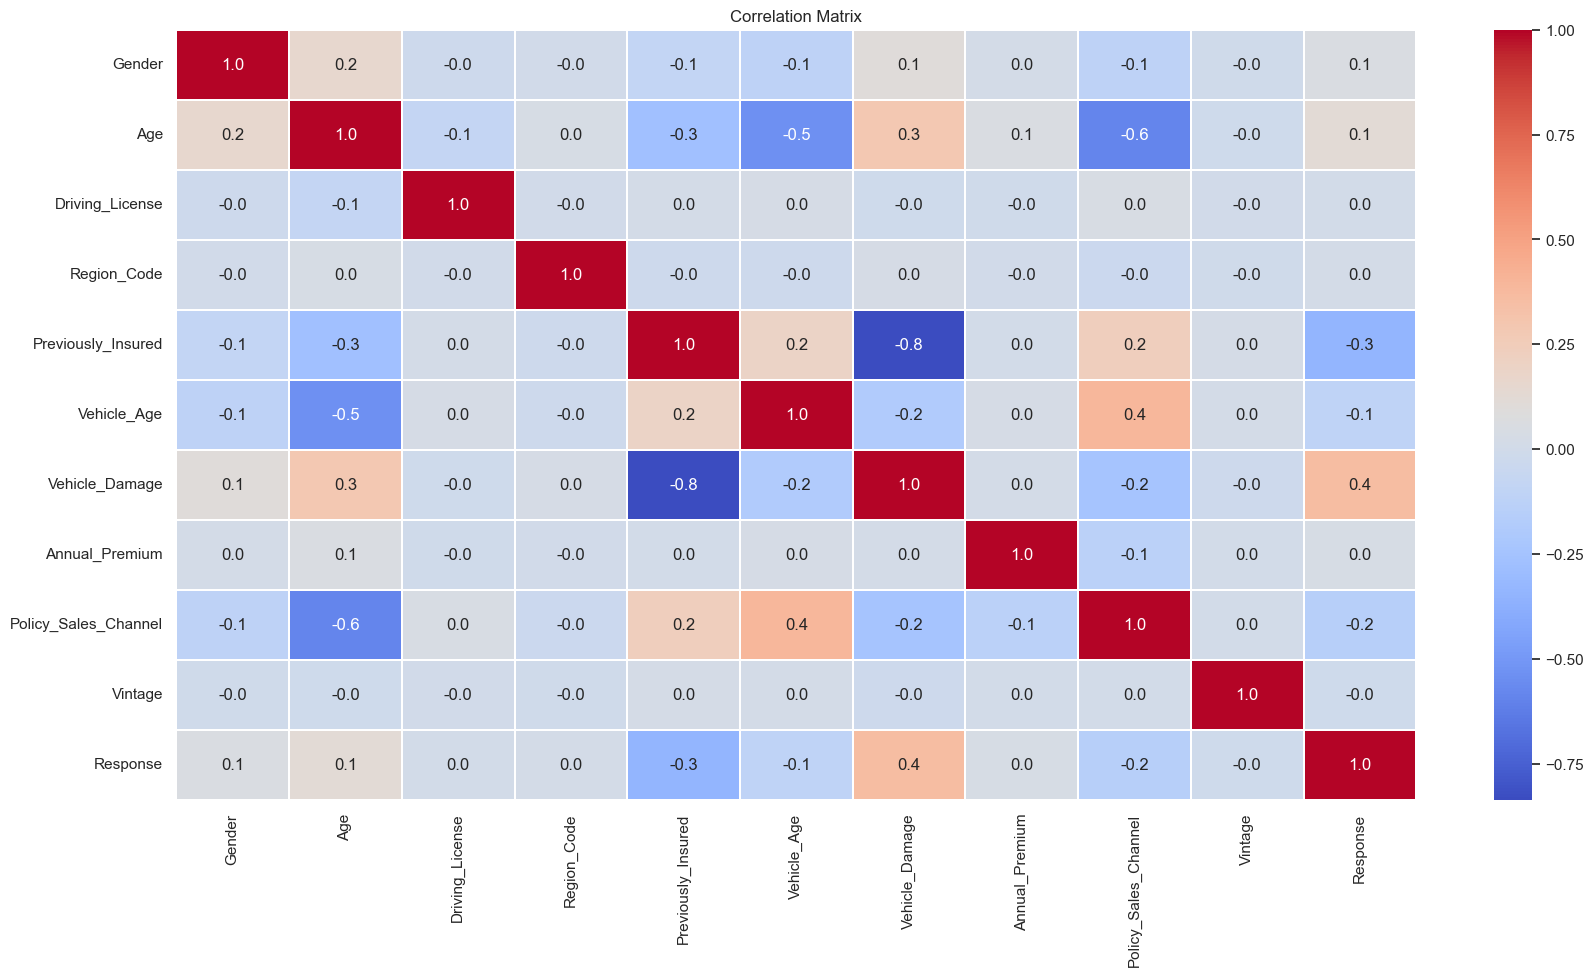

In [25]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.1)
#plt.gcf().set_facecolor('skyblue')  
plt.title('Correlation Matrix')
plt.show()

/var/folders/d_/p5lwv9b55b1bx_rx8qk19l9h0000gn/T/ipykernel_67942/1355361589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_train, palette='Set1')
/var/folders/d_/p5lwv9b55b1bx_rx8qk19l9h0000gn/T/ipykernel_67942/1355361589.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Driving_License', data=df_train, palette='Set2')
/var/folders/d_/p5lwv9b55b1bx_rx8qk19l9h0000gn/T/ipykernel_67942/1355361589.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Previously_Insured', data=df_train, palette='Set3')
/var/f

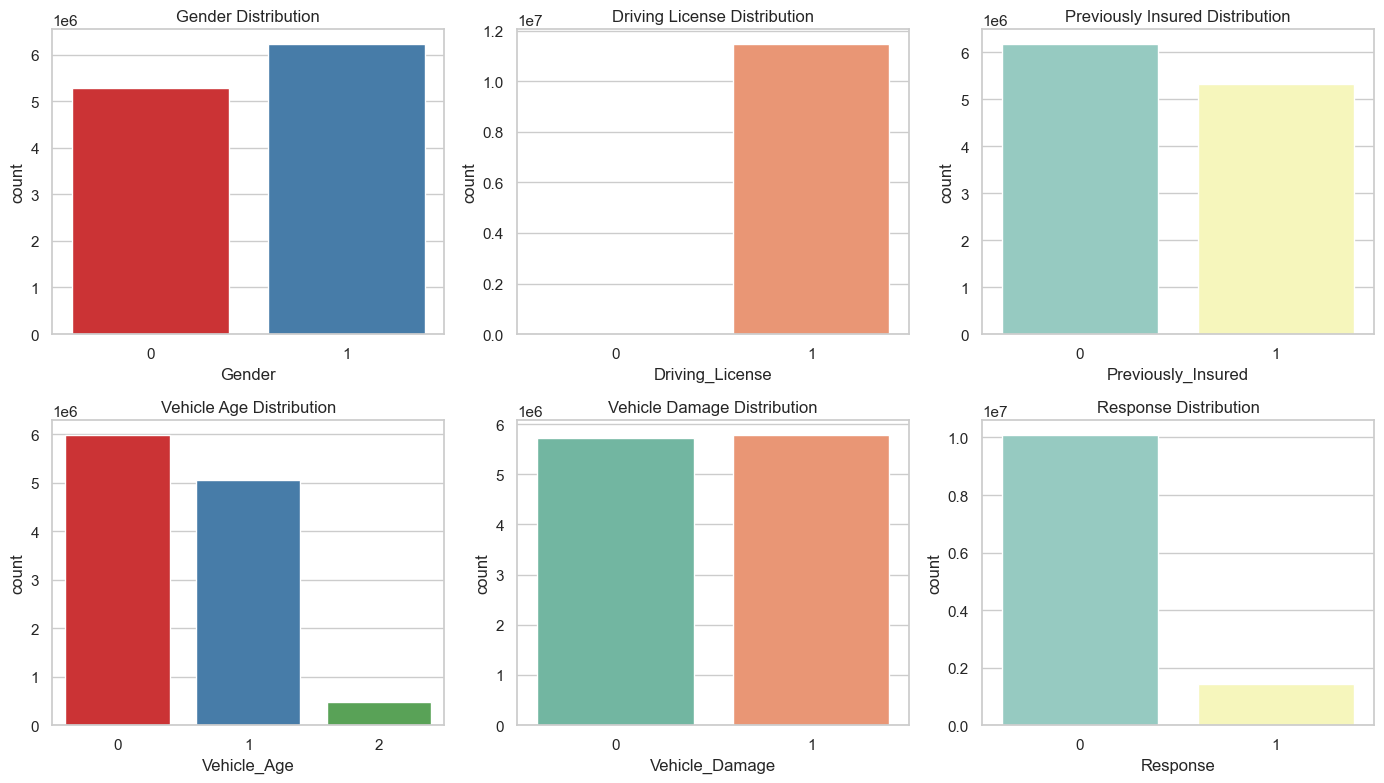

In [26]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=df_train, palette='Set1')
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='Driving_License', data=df_train, palette='Set2')
plt.title('Driving License Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Previously_Insured', data=df_train, palette='Set3')
plt.title('Previously Insured Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Vehicle_Age', data=df_train, palette='Set1')
plt.title('Vehicle Age Distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='Vehicle_Damage', data=df_train, palette='Set2')
plt.title('Vehicle Damage Distribution')

plt.subplot(2, 3, 6)
sns.countplot(x='Response', data=df_train, palette='Set3')
plt.title('Response Distribution')

plt.tight_layout()
plt.show()

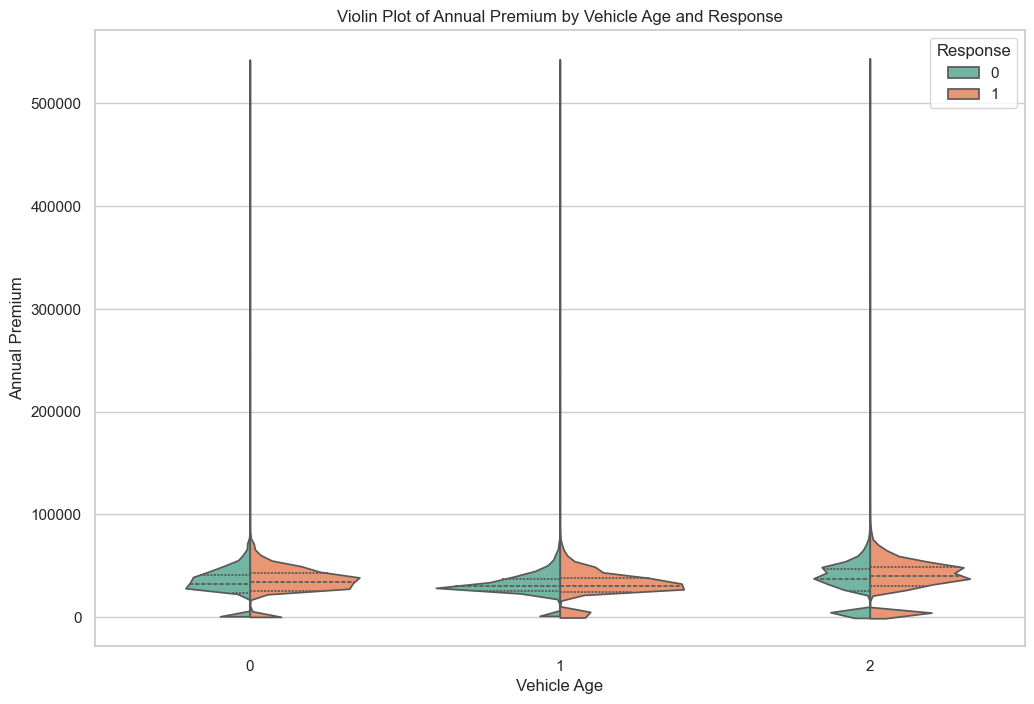

In [27]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Vehicle_Age', y='Annual_Premium', data=df_train, hue='Response', split=True, palette='Set2', inner='quartile')
plt.title('Violin Plot of Annual Premium by Vehicle Age and Response')
plt.xlabel('Vehicle Age')
plt.ylabel('Annual Premium')
plt.show()

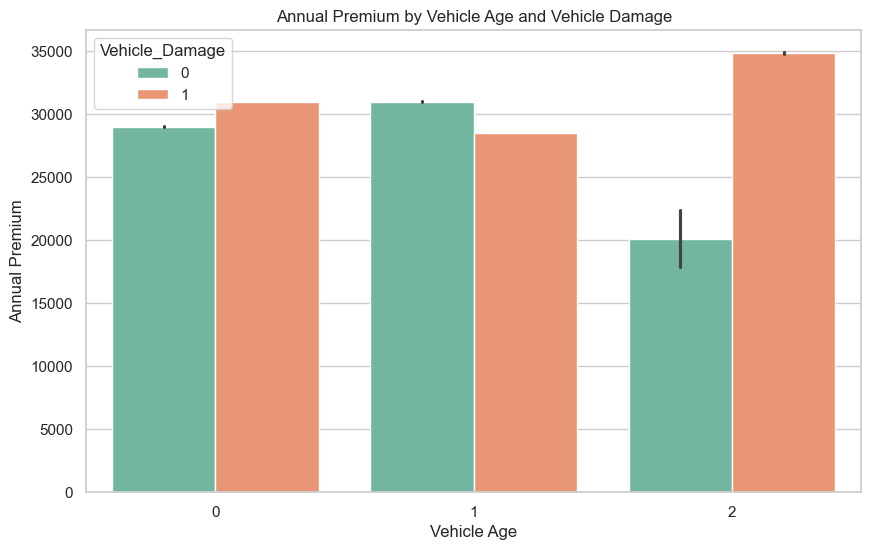

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Age', y='Annual_Premium', hue='Vehicle_Damage', data=df_train, palette='Set2')
plt.title('Annual Premium by Vehicle Age and Vehicle Damage')
plt.xlabel('Vehicle Age')
plt.ylabel('Annual Premium')
plt.show()

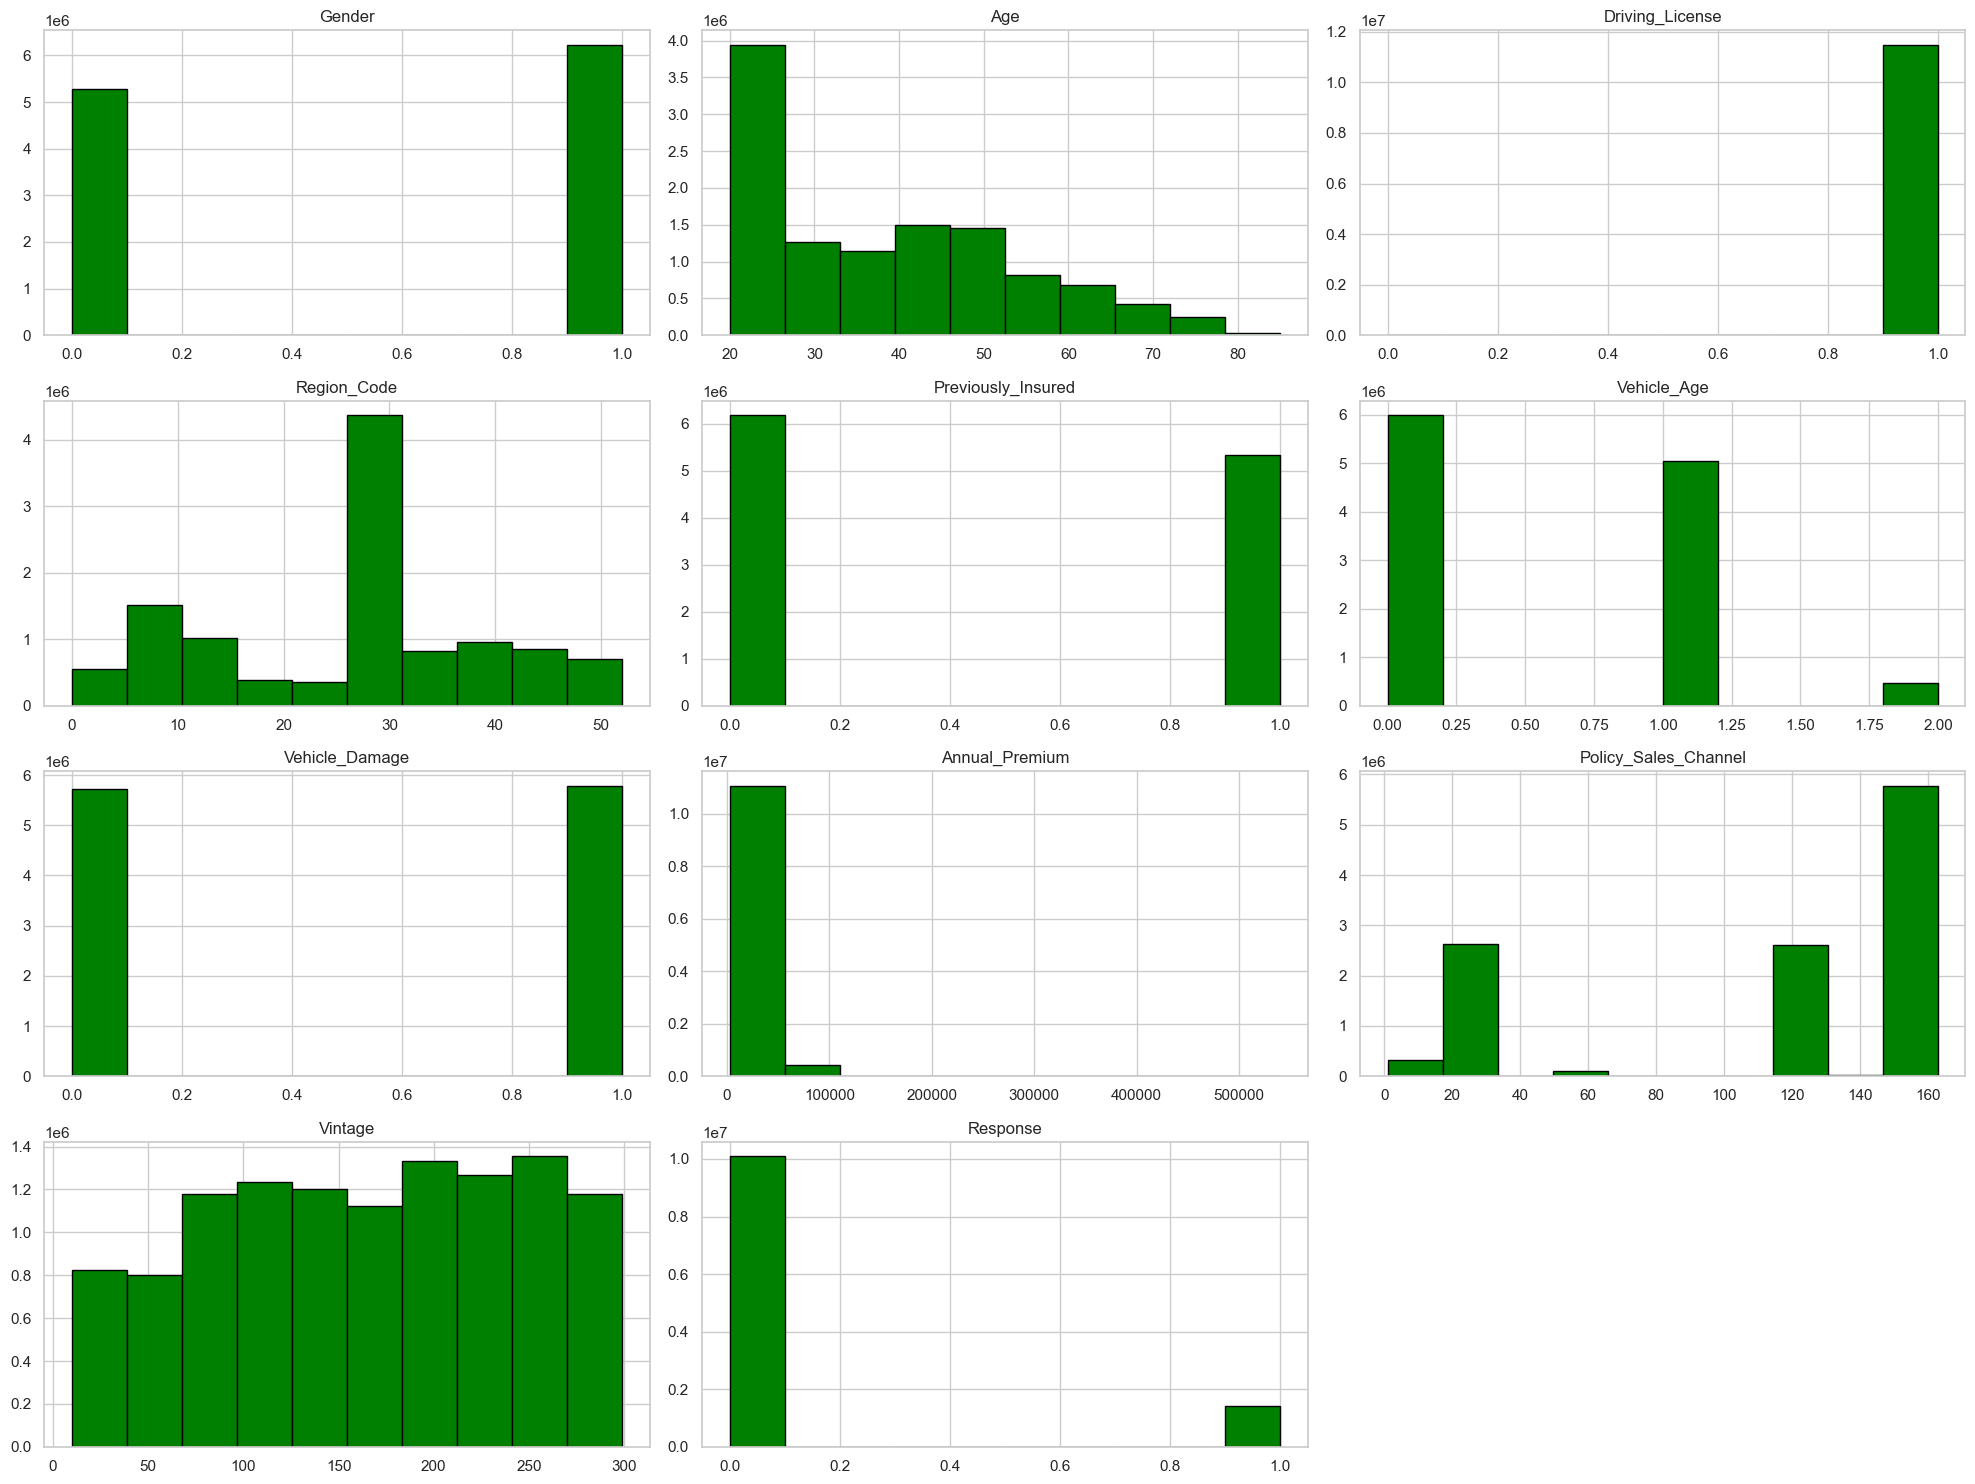

In [29]:
df_train.hist(figsize=(20, 15), color='green', edgecolor='black')
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()

In [31]:
df_train.dtypes

Gender                  int64
Age                     int64
Driving_License         int64
Region_Code             int64
Previously_Insured      int64
Vehicle_Age             int64
Vehicle_Damage          int64
Annual_Premium          int64
Policy_Sales_Channel    int64
Vintage                 int64
Response                int64
dtype: object

In [32]:
df_test.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    
**Age vs. Vehicle_Age**:
There is a strong negative correlation (-0.5377), indicating that as age increases, the age of the vehicle tends to decrease. This makes sense as older individuals may prefer newer vehicles.
    
**Previously_Insured vs. Vehicle_Damage:**
There is a strong negative correlation (-0.8362), suggesting that individuals who have not previously been insured are more likely to have vehicle damage. This makes intuitive sense since insured individuals might be more cautious about vehicle maintenance.
        
**Previously_Insured vs. Response:**
There is a moderate negative correlation (-0.3459), indicating that individuals who are previously insured are less likely to respond positively to insurance offers. This could be due to perceived redundancy or satisfaction with current coverage.
    
**Vehicle_Damage vs. Response:**
There is a moderate positive correlation (0.3598), suggesting that individuals with vehicle damage are more likely to respond positively to insurance offers. This implies that damaged vehicles might prompt individuals to seek additional or improved insurance coverage.

In [33]:
y = df_train['Response'] 
X = df_train.drop(['Response'],axis=1)

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: cyan; padding: 20px; border-radius: 20px; border: 7px solid #2ca02c; width: 95%;">
  <span style="font-weight: bold; color: #ff7f0e; animation: pulse 2s infinite;"></span>Model Building |
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> Training |</span> Classification

</p>

In [34]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.2, random_state =42)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Regression Analysis♒🌊</h1>  
     
</div>

In [35]:
train_X = train_X.to_numpy()
train_y = train_y.to_numpy()
test_X = test_X.to_numpy()
test_y = test_y.to_numpy()

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.03,  # Reduced learning rate
    'alpha': 0.1,  # Slightly reduced regularization
    'subsample': 0.851,  # Increased subsample fraction
    'colsample_bytree': 0.45,  # Adjusted colsample_bytree
    'max_depth': 12,  # Reduced max depth
    'min_child_weight': 10,  # Slightly increased to control overfitting
    'gamma': 1e-6,  # Slightly increased gamma
    'random_state': 42,
    'max_bin': 100,  # Reduced max_bin from 50000
    'enable_categorical': True,
    'n_estimators': 100,  # Keep high for early stopping
    'tree_method': 'hist',
    'early_stopping_rounds':50,
    'verbose':50
}
gc.collect()
model = XGBClassifier(**params,device="cuda")
XGB = model.fit(
    train_X, 
    train_y, 
    eval_set=[(test_X, test_y)]    
)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:57:24] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:57:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-auc:0.81923
[1]	validation_0-auc:0.85366
[2]	validation_0-auc:0.86083
[3]	validation_0-auc:0.86287
[4]	validation_0-auc:0.86501
[5]	validation_0-auc:0.86559
[6]	validation_0-auc:0.86519
[7]	validation_0-auc:0.86558
[8]	validation_0-auc:0.86518
[9]	validation_0-auc:0.86467
[10]	validation_0-auc:0.86478
[11]	validation_0-auc:0.86442
[12]	validation_0-auc:0.86386
[13]	validation_0-auc:0.86344
[14]	validation_0-auc:0.86340
[15]	validation_0-auc:0.86397
[16]	validation_0-auc:0.86375
[17]	validation_0-auc:0.86339
[18]	validation_0-auc:0.86386
[19]	validation_0-auc:0.86424
[20]	validation_0-auc:0.86448
[21]	validation_0-auc:0.86456
[22]	validation_0-auc:0.86476
[23]	validation_0-auc:0.86493
[24]	validation_0-auc:0.86527
[25]	validation_0-auc:0.86581
[26]	validation_0-auc:0.86592
[27]	validation_0-auc:0.86593
[28]	validation_0-auc:0.86585
[29]	validation_0-auc:0.86581
[30]	validation_0-auc:0.86614
[31]	validation_0-auc:0.86619
[32]	validation_0-auc:0.86605
[33]	validation_0-au

In [37]:
prediction = XGB.predict(test_X)


In [38]:
print("Best iteration:", model.best_iteration)

Best iteration: 99


In [39]:
val_pred_prob = XGB.predict_proba(test_X)[:, 1]
auc = roc_auc_score(test_y, val_pred_prob)
print(f"Validation AUC: {auc:.5f}")

Validation AUC: 0.87009


In [40]:
df_test = df_test.to_numpy()

In [53]:
test_pred_prob = XGB.predict_proba(df_test)[:, 1].astype(int)

In [42]:
df_sub.Response= test_pred_prob

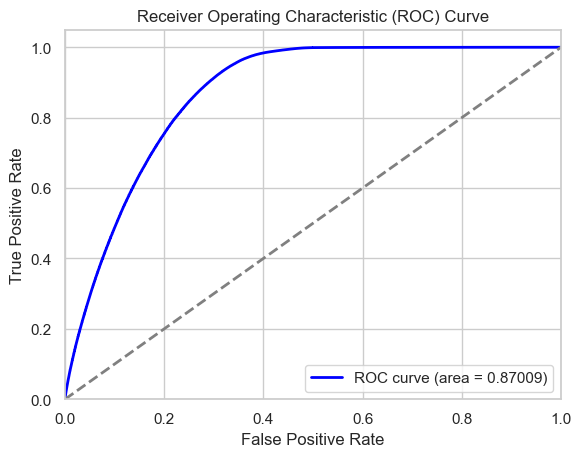

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(test_y, val_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.5f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

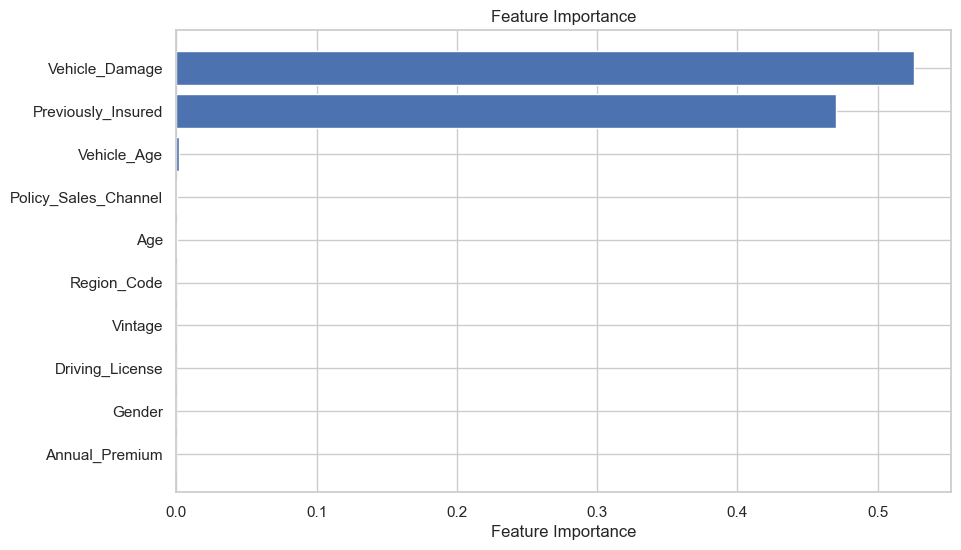

In [44]:
plt.figure(figsize=(10, 6))
importance = model.feature_importances_
sorted_idx = np.argsort(importance)
plt.barh(range(len(importance)), importance[sorted_idx], align='center')
plt.yticks(range(len(importance)), [df_train.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

In [45]:
from sklearn.metrics import roc_curve, confusion_matrix, precision_recall_curve, average_precision_score


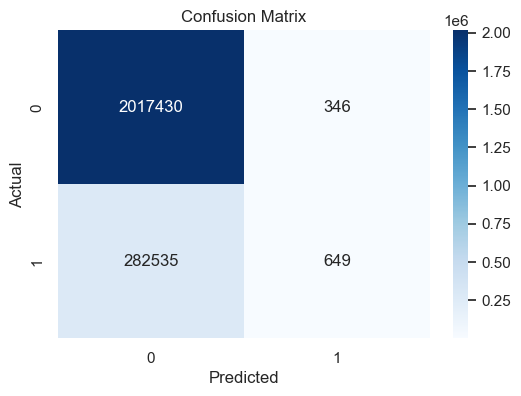

In [67]:
#val_pred = XGB.predict(val_X)
cm = confusion_matrix(test_y, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

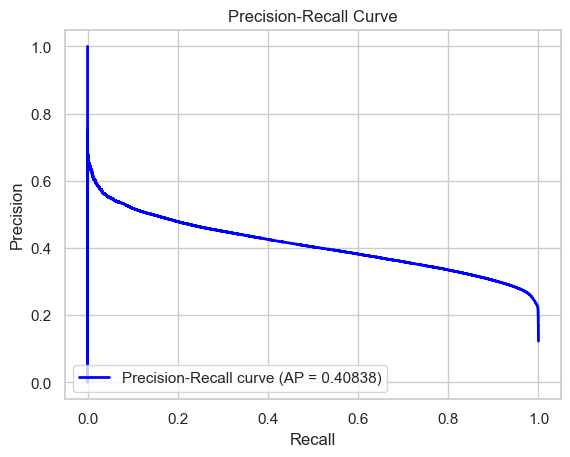

In [47]:
precision, recall, _ = precision_recall_curve(test_y, val_pred_prob)
average_precision = average_precision_score(test_y, val_pred_prob)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.5f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [48]:
df_sub.to_csv('submission.csv', index = False)
pd.read_csv('submission.csv')

,id,Response
0,11504798,0.023840
1,11504799,0.326978
2,11504800,0.226007
3,11504801,0.012577
4,11504802,0.067750
...,...,...
7669861,19174659,0.224925
7669862,19174660,0.012564
7669863,19174661,0.019127
7669864,19174662,0.456450
